In [1]:
from datetime import datetime
import pandas_datareader.data as wb
import numpy as np

In [2]:
def tanh(data):
    numerator = data - np.max(data) + data - np.min(data)
    denominator = np.max(data) - np.min(data)
    return numerator  /  denominator * 1.0 


def MinMaxScaler(data):
    numerator = data - np.min(data)
    denominator = np.max(data) - np.min(data)
    return numerator  /  denominator * 1.0 


In [3]:
start = datetime(1981,12,2)
end = datetime(2019,12,13)
df = wb.DataReader('^KS11', 'yahoo',start,end)

display(df['Adj Close'])


Date
1997-07-01     758.030029
1997-07-02     777.289978
1997-07-03     775.260010
1997-07-04     781.700012
1997-07-07     773.510010
                 ...     
2019-12-09    2088.649902
2019-12-10    2098.000000
2019-12-11    2105.620117
2019-12-12    2137.350098
2019-12-13    2170.250000
Name: Adj Close, Length: 5528, dtype: float64

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

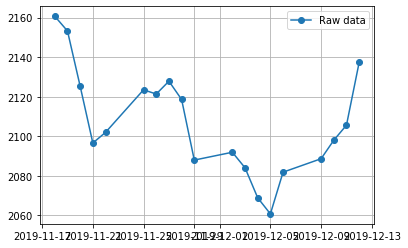

In [19]:
# Raw data

sample_df = df[-20:-1]

time = sample_df.index
price = sample_df['Adj Close']

plt.plot(price,'-o',label='Raw data')
plt.grid()
plt.legend()
plt.savefig('raw.png')

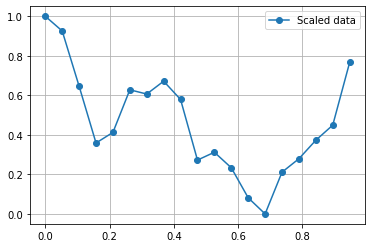

In [20]:
# Scaled data
scaled_price = MinMaxScaler(price)
scaled_time = np.arange(len(time)) / len(time)
plt.plot(scaled_time,scaled_price,'-o',label='Scaled data')
plt.grid()
plt.legend()
plt.savefig('scaled.png')

[0.]


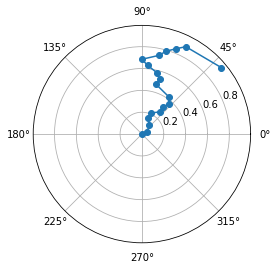

In [21]:
pi = np.arccos(scaled_price)

print(np.arccos([1]))
plt.polar(pi,scaled_time,'-o')
plt.savefig('polot.png')

In [9]:
import math
def GramMat(x,y,f):
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))

def cos_sum(a,b):
    return(math.cos(a+b))

In [10]:
pi_val = pi.values

In [11]:
Gram = GramMat(pi,pi,cos_sum)

In [12]:
print(Gram.shape)

(19, 19)


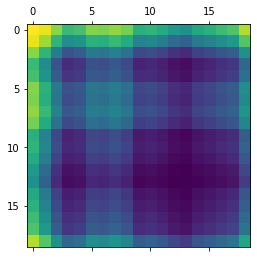

In [17]:
plt.matshow(Gram)
plt.savefig('gram_sample.png')

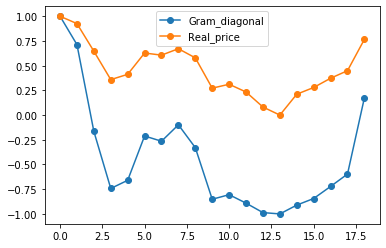

In [18]:
plt.plot(np.arange(len(Gram[0])),np.diagonal(Gram),'-o',label='Gram_diagonal')
plt.plot(np.arange(len(Gram[0])),scaled_price,'-o',label='Real_price')
plt.legend()
plt.savefig('gram_linear.png')